In [1]:
#exercise: build a simple neural network for classifying handwritten digits using the MNIST dataset
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
#Load the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
#Preprocess the Data – why?
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
#Reshape the images, to flatten them into 1D arrays.
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [5]:
#Build the Neural Network Model
model = keras.Sequential([
 keras.layers.Dense(128, activation='relu', input_shape=(784,)),
 keras.layers.Dense(10, activation='softmax')
])

C:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#Compile the Model
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [7]:
#Train the Model:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8810 - loss: 0.4260
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9625 - loss: 0.1251
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9768 - loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9829 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9869 - loss: 0.0443


In [8]:
#Evaluate the Model:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9754 - loss: 0.0908
Test accuracy: 0.9781000018119812


In [9]:
#Make Predictions
predictions = model.predict(test_images)
print(predictions[0]) #probabilities for the first test image.
print(tf.argmax(predictions[0])) #The predicted digit.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step    
[1.5991550e-07 3.7786166e-10 4.5528625e-07 1.2086255e-04 2.1947255e-11
 4.4644781e-09 1.1195580e-12 9.9987626e-01 4.9056933e-07 1.7376078e-06]
tf.Tensor(7, shape=(), dtype=int64)


In [10]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
# Function to display an image
def display_image(image, label):
    plt.imshow(image, cmap='Reds_r') # Display the image in grayscale
    plt.title(f'Label: {label}')
    plt.show()

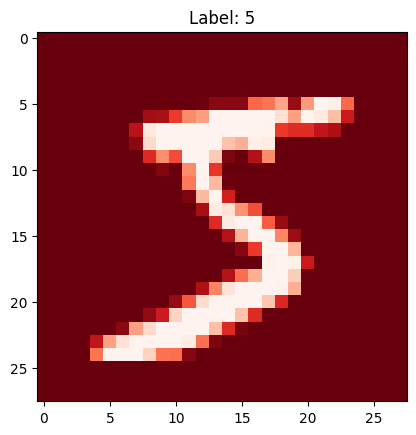

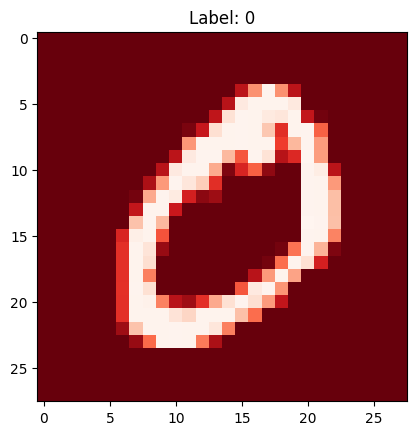

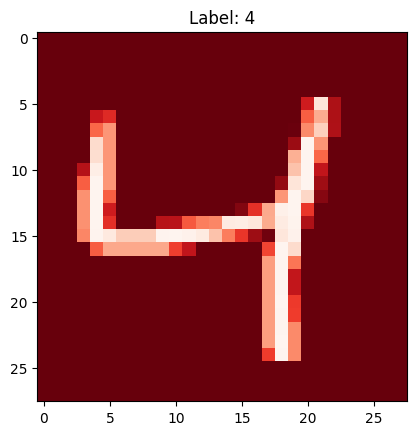

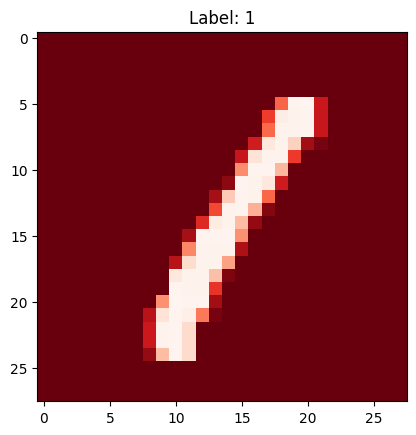

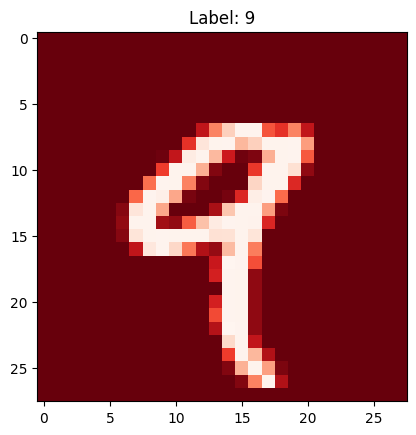

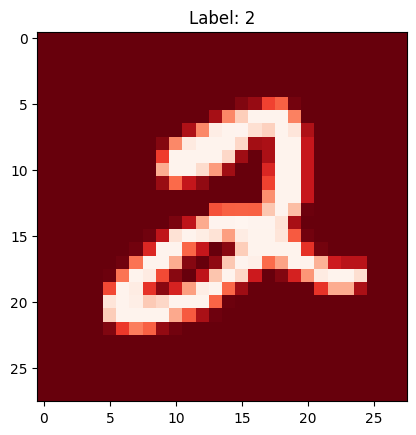

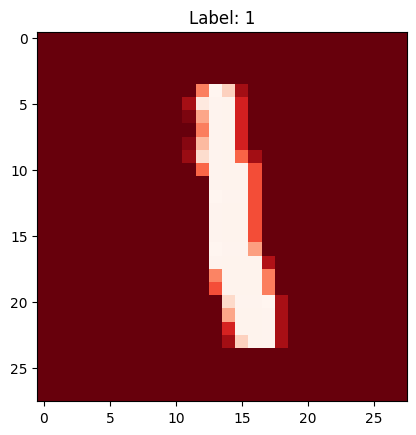

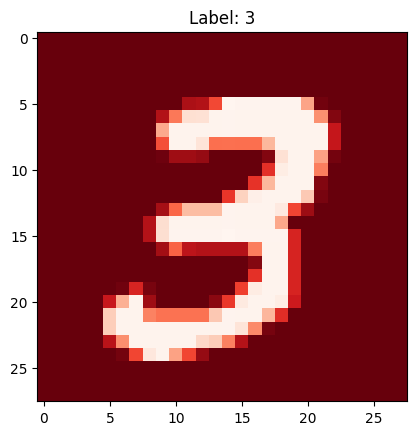

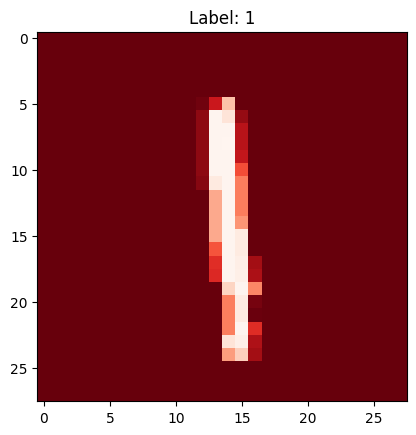

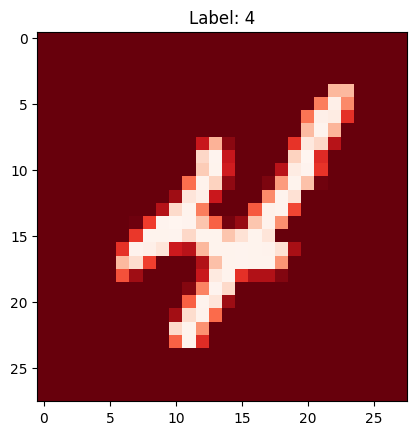

In [27]:
# Display the first 10 images from the training set
for i in range(10):
    display_image(train_images[i], train_labels[i])

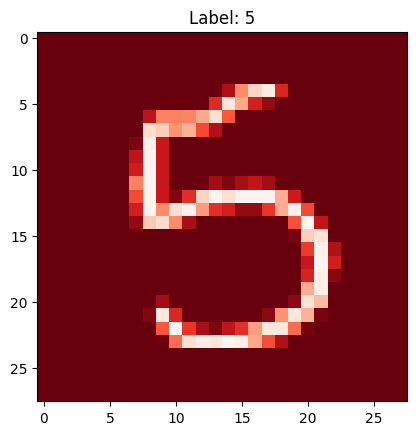

In [28]:
# Display a specific image from the test set (e.g., the 50th image)
specific_image_index = 53
display_image(test_images[specific_image_index], test_labels[specific_image_index])

In [31]:
#display several images in a grid.
def display_grid(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()
    for i in range(rows*cols):
        axes[i].imshow(images[i], cmap='Blues_r')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

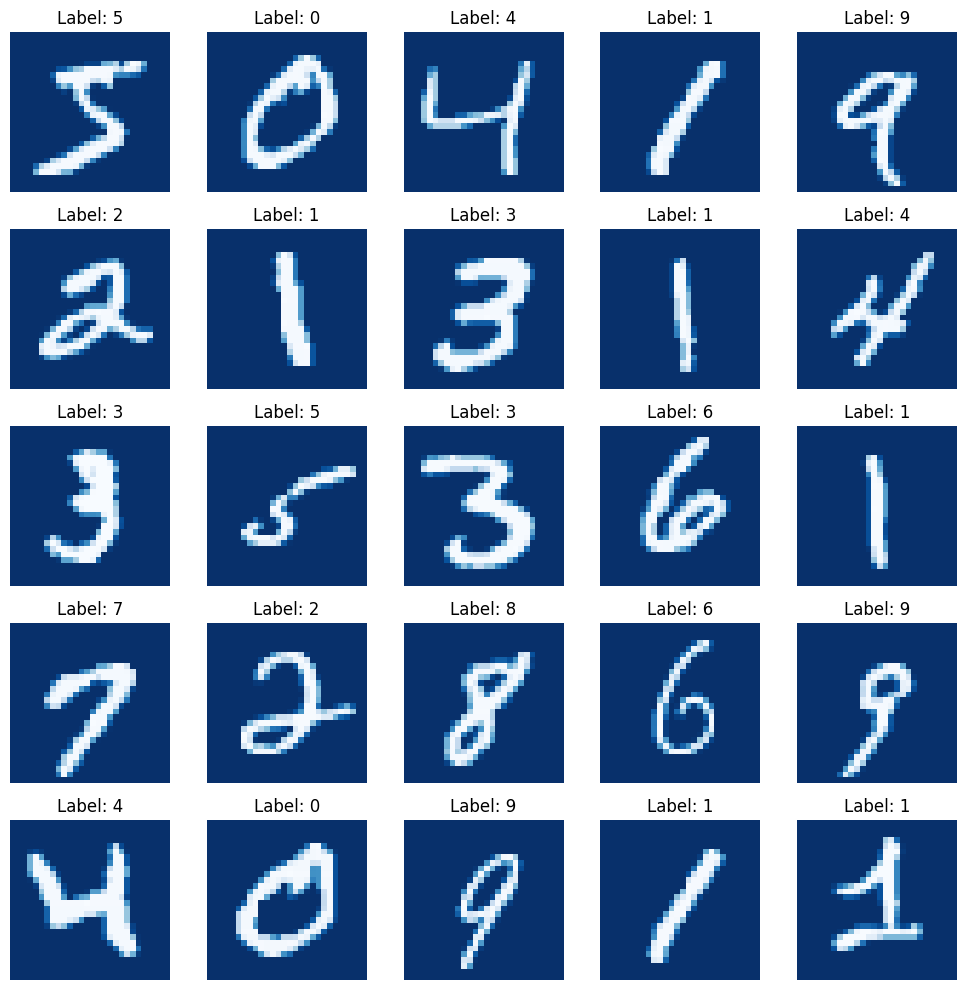

In [32]:
# Example of calling the function
display_grid(train_images[0:25], 
             train_labels[0:25], 
             5, 5)